# Youtube Rewind 2018 Sentiment Analysis
<img src="https://millardwestcatalyst.com/wp-content/uploads/2018/12/1544800434803-900x506.jpeg">

YouTube Rewind 2018: Everyone Controls Rewind was a video that was uploaded to the official channel of the video-sharing website YouTube on December 6, 2018, as the ninth installment of the YouTube Rewind series. As of March 2023, YouTube Rewind 2018 has over **19 million dislikes**, making it the most disliked video on YouTube.

Here are some of the reasons why YouTube Rewind 2018 was so poorly received:

- It was out of touch with the interests of the YouTube community.
- It was too focused on mainstream celebrities and not enough on YouTubers.
- It was poorly produced and edited.
- It was not funny or engaging.

<a href="https://www.youtube.com/watch?v=YbJOTdZBX1g">Watch the full video here</a>

This project analyzes the sentiment surrounding YouTube Rewind 2018, using natural language processing to evaluate viewer reactions and uncover trends in comments and reactions. The findings provide insights into the overall reception of the video and its impact.


## Importing Packages

In [1]:
import os 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import pandas as pd

## Loading the Data
Comments and reactions from YouTube Rewind 2018 are collected via data scraping and then loaded.

In [2]:
df = pd.read_csv('youtube.csv')
df.head()

,style-scope 2
0,2018:comments: it gets worse and worse every year
1,We’ve officially reached the 4 year anniversar...
2,"Lets be real, the real reason YouTube removed ..."
3,Back when a rewind was the biggest problem we had
4,"It's been four years already? Man, time has fl..."


In [3]:
df.shape

(628, 1)

## Pre-Processing of data from CSV to TXT

We loaded the saved comments from CSV, converted it to a list, looped through the list, and saved each comment in a TXT file.

In [4]:
# save reviews to a text file
reviews = df["style-scope 2"].values.tolist()

# Write the reviews to a text file
with open("rawdata.txt", "w", encoding='utf-8') as f:
  for review in reviews:
    f.write(review + "\n")
    

In [5]:
text = open('rawdata.txt', 'r', encoding='utf-8')
data = text.read()
print(data)

2018:comments: it gets worse and worse every year
We’ve officially reached the 4 year anniversary for this disaster
Lets be real, the real reason YouTube removed dislikes was because they couldn’t stand to see the video they made was and probably still is the most disliked video on the whole platform.
Back when a rewind was the biggest problem we had
It's been four years already? Man, time has flown by so fast these days. It's still one the most disliked videos on YouTube with over 20 million dislikes.
I'm 100 percent sure this is the reason the dislikes were removed
Will Smith: “It’s Rewind time”
Fun fact, this video and the one made in 2019 are single-handily the reason why they don't do rewinds anymore
Zero dislikes, 3.1 MILLION likes!? This video must be a masterpiece!
This makes me feel weirdly nostalgic. It’s a rare moment in history where all of humanity came together to hate on this awful video, together.
Respect to the 20,284,162 million who disliked it
disappointed but not su

In [6]:
ensw = stopwords.words('english')
print(ensw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Preprocessing
The collected data is cleaned by removing irrelevant characters, stopwords, and special symbols.

In [7]:
textArray = word_tokenize(data.lower())     

In [8]:
filterArray = [word for word in textArray if word not in ensw]

In [9]:
print(filterArray)

['2018', ':', 'comments', ':', 'gets', 'worse', 'worse', 'every', 'year', '’', 'officially', 'reached', '4', 'year', 'anniversary', 'disaster', 'lets', 'real', ',', 'real', 'reason', 'youtube', 'removed', 'dislikes', '’', 'stand', 'see', 'video', 'made', 'probably', 'still', 'disliked', 'video', 'whole', 'platform', '.', 'back', 'rewind', 'biggest', 'problem', "'s", 'four', 'years', 'already', '?', 'man', ',', 'time', 'flown', 'fast', 'days', '.', "'s", 'still', 'one', 'disliked', 'videos', 'youtube', '20', 'million', 'dislikes', '.', "'m", '100', 'percent', 'sure', 'reason', 'dislikes', 'removed', 'smith', ':', '“', '’', 'rewind', 'time', '”', 'fun', 'fact', ',', 'video', 'one', 'made', '2019', 'single-handily', 'reason', "n't", 'rewinds', 'anymore', 'zero', 'dislikes', ',', '3.1', 'million', 'likes', '!', '?', 'video', 'must', 'masterpiece', '!', 'makes', 'feel', 'weirdly', 'nostalgic', '.', '’', 'rare', 'moment', 'history', 'humanity', 'came', 'together', 'hate', 'awful', 'video', '

In [10]:
stringFilter = ' '.join(filterArray)

In [11]:
print(stringFilter)

2018 : comments : gets worse worse every year ’ officially reached 4 year anniversary disaster lets real , real reason youtube removed dislikes ’ stand see video made probably still disliked video whole platform . back rewind biggest problem 's four years already ? man , time flown fast days . 's still one disliked videos youtube 20 million dislikes . 'm 100 percent sure reason dislikes removed smith : “ ’ rewind time ” fun fact , video one made 2019 single-handily reason n't rewinds anymore zero dislikes , 3.1 million likes ! ? video must masterpiece ! makes feel weirdly nostalgic . ’ rare moment history humanity came together hate awful video , together . respect 20,284,162 million disliked disappointed surprised . : ( literally best part video rewind aged like milk . extension , video 20m dislikes april 21st , 2023. let 's keep going ! ’ kinda sad quit rewinds every year , ’ come together end every year laugh purposely bad video . wondering 20 million dislikes surprised n't even man

In [12]:
words = set(nltk.corpus.words.words())

In [13]:
stringString = re.sub('\W+','\n', stringFilter )

In [14]:
f = open("newList.txt", "w", encoding='utf-8')
f.write(stringString)
f.close()

In [15]:
with open('newList.txt', 'r', encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    f = open('finalList.txt', 'w')
    while line:
        data = line.strip()
        if data in words:
            data = re.sub(r'\b\w{1,2}\b', '\n', data)
            f.write(data + '\n')
        line = fp.readline()
        cnt += 1

In [16]:
finalText = open('finalList.txt', 'r')
finalData = finalText.read()

tokenwords = word_tokenize(finalData)
countwords = Counter(tokenwords)

In [17]:
countList = list(Counter((countwords).items()))
newList = '\n'.join([str(i) for i in countList])

In [18]:
# remove tuples with single character
newList = re.sub(r'\b\w\b', '', newList)

In [19]:
print(newList)

('worse', 10)
('every', 17)
('year', 30)
('officially', )
('anniversary', )
('disaster', )
('real', )
('reason', 12)
('removed', 15)
('stand', )
('see', 13)
('video', 123)
('made', 20)
('probably', )
('still', 13)
('whole', )
('platform', )
('back', 33)
('rewind', 98)
('biggest', )
('problem', )
('four', )
('already', )
('man', )
('time', 33)
('flown', )
('fast', )
('days', )
('one', 30)
('million', 61)
('percent', )
('sure', )
('smith', 17)
('fun', )
('fact', 11)
('single', )
('handily', )
('zero', )
('must', 24)
('masterpiece', 11)
('feel', )
('weirdly', )
('nostalgic', 13)
('rare', )
('moment', )
('history', )
('humanity', )
('came', 10)
('together', )
('hate', )
('awful', )
('respect', )
('disappointed', )
('literally', )
('best', 27)
('part', 34)
('aged', )
('like', 22)
('milk', )
('extension', )
('let', 12)
('keep', )
('going', )
('sad', 16)
('quit', )
('come', )
('end', )
('laugh', )
('purposely', )
('bad', 33)
('wondering', )
('even', 28)
('manage', )
('get', 19)
('link', )
('s

## Feature Extraction
Text features such as word frequency and term frequency-inverse document frequency (TF-IDF) are extracted from the preprocessed data.

In [20]:
finalData = re.sub("[)!@#$(]", "", newList)
f = open("Frequency.csv", "w")
f.write(finalData)
f.close()

In [21]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

In [22]:
Ptext = open('positive.txt', 'r')
positive = Ptext.read()

Ntext = open('negative.txt', encoding='ISO-8859-1')
negative = Ntext.read()

In [23]:
with open('finalList.txt') as fp:
    line = fp.readline()
    cnt = 1
    f = open('positiveList.txt', 'w')
    while line:
        data = line.strip()
        if data in positive:
            data = re.sub(r'\b\w{1,2}\b', '\n', data)
            f.write(data + '\n')
            # print(data)
        line = fp.readline()
        cnt += 1

In [24]:
PLtext = open('positiveList.txt', 'r')
positiveList = PLtext.read()
positive = re.sub(r'\b\w{1,2}\b', '\n', positiveList)

textArray = word_tokenize(positiveList.lower())
filterArray = [item for item in textArray if item not in negative]

stringFilter = '\n'.join(filterArray)
stringFilter = Counter(filterArray)

print(stringFilter)

Counter()


In [25]:
tokenwords = word_tokenize(positiveList)
countList = list(Counter(tokenwords).items())
newPositiveList = '\n'.join([str(i) for i in countList])

In [26]:
print(newPositiveList)

In [27]:
with open('finalList.txt') as fp:
    line = fp.readline()
    cnt = 1
    f = open('negativeList.txt', 'w')
    while line:
        data = line.strip()
        if data in negative:
            # print(data)
            data = re.sub(r'\b\w{1,2}\b', '\n', data)
            f.write(data + '\n')
        line = fp.readline()
        cnt += 1

In [28]:
NLtext = open('negativeList.txt', 'r')
NegativeList = NLtext.read()
NegativeList = re.sub(r'\b\w{1,2}\b', '\n', NegativeList)


textArray = word_tokenize(NegativeList.lower())
filterArray = [item for item in textArray if item not in positive]

stringFilter = '\n'.join(filterArray)
stringFilter = Counter(filterArray)

print(stringFilter)

Counter()


In [29]:
tokenwords = word_tokenize(NegativeList)
countList = list(Counter(tokenwords).items())
newNegativeList = '\n'.join([str(i) for i in countList])

In [30]:
finalNegative = re.sub("[)!@#$(]", "", newNegativeList)
finalPositive = re.sub("[)!@#$(]", "", newPositiveList)

In [31]:
p = open('positiveData.csv', 'w')
n = open('negativeData.csv', 'w')

p.write(finalPositive)
n.write(finalNegative)

p.close()
n.close()

In [32]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [33]:
text = open('rawdata.txt', 'r', encoding='utf-8')
data = text.read()

In [34]:
analyzer = SentimentIntensityAnalyzer()

In [35]:
count = list(analyzer.polarity_scores(data).items())
vs = '\n'.join([str(i) for i in count])

csvFileFormat = re.sub("[)!@#$(]", "", vs)
print(csvFileFormat)

'neg', 0.15
'neu', 0.641
'pos', 0.209
'compound', 1.0


## Sentiment Analysis
Machine learning algorithms are applied to classify comments as positive, negative, or neutral based on the extracted features.

In [36]:
f = open('Polarity.csv', 'w')
f.write('Polarity,Value\n')
f.write(csvFileFormat)
f.close()

In [37]:
filepath = 'rawdata.txt'
with open(filepath, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('polarityList.txt', 'w')
    while line:
        data = line.strip()
        countlist = list(analyzer.polarity_scores(data).items())
        vs = ":".join([str(i) for i in countlist])
        fa.write(vs + '\n')
        print(vs)
        line = fp.readline()
        cnt += 1

('neg', 0.508):('neu', 0.492):('pos', 0.0):('compound', -0.7351)
('neg', 0.342):('neu', 0.56):('pos', 0.098):('compound', -0.6678)
('neg', 0.155):('neu', 0.845):('pos', 0.0):('compound', -0.6901)
('neg', 0.231):('neu', 0.769):('pos', 0.0):('compound', -0.4019)
('neg', 0.18):('neu', 0.82):('pos', 0.0):('compound', -0.6901)
('neg', 0.18):('neu', 0.667):('pos', 0.153):('compound', -0.1027)
('neg', 0.0):('neu', 1.0):('pos', 0.0):('compound', 0.0)
('neg', 0.0):('neu', 0.852):('pos', 0.148):('compound', 0.5106)
('neg', 0.148):('neu', 0.44):('pos', 0.412):('compound', 0.6988)
('neg', 0.288):('neu', 0.712):('pos', 0.0):('compound', -0.836)
('neg', 0.229):('neu', 0.508):('pos', 0.263):('compound', 0.1027)
('neg', 0.442):('neu', 0.218):('pos', 0.339):('compound', 0.0155)
('neg', 0.0):('neu', 0.588):('pos', 0.412):('compound', 0.6369)
('neg', 0.0):('neu', 0.667):('pos', 0.333):('compound', 0.3612)
('neg', 0.125):('neu', 0.875):('pos', 0.0):('compound', -0.4574)
('neg', 0.166):('neu', 0.739):('pos

In [38]:
text = open('polarityList.txt', 'r')
polarity = text.read()
Format = re.sub("[)!@''#$(pos,neu,neg,compound]", '', polarity)
csvFileFormat = re.sub(':',',', Format)
print('Negative, Neutral, Positive, Compound')
print(csvFileFormat)

Negative, Neutral, Positive, Compound
 0.508, 0.492, 0.0, -0.7351
 0.342, 0.56, 0.098, -0.6678
 0.155, 0.845, 0.0, -0.6901
 0.231, 0.769, 0.0, -0.4019
 0.18, 0.82, 0.0, -0.6901
 0.18, 0.667, 0.153, -0.1027
 0.0, 1.0, 0.0, 0.0
 0.0, 0.852, 0.148, 0.5106
 0.148, 0.44, 0.412, 0.6988
 0.288, 0.712, 0.0, -0.836
 0.229, 0.508, 0.263, 0.1027
 0.442, 0.218, 0.339, 0.0155
 0.0, 0.588, 0.412, 0.6369
 0.0, 0.667, 0.333, 0.3612
 0.125, 0.875, 0.0, -0.4574
 0.166, 0.739, 0.095, -0.4033
 0.213, 0.787, 0.0, -0.4019
 0.0, 0.94, 0.06, 0.2263
 0.0, 1.0, 0.0, 0.0
 0.0, 1.0, 0.0, 0.0
 0.0, 0.852, 0.148, 0.5106
 0.148, 0.44, 0.412, 0.6988
 0.288, 0.712, 0.0, -0.836
 0.229, 0.508, 0.263, 0.1027
 0.442, 0.218, 0.339, 0.0155
 0.0, 0.588, 0.412, 0.6369
 0.0, 0.667, 0.333, 0.3612
 0.125, 0.875, 0.0, -0.4574
 0.166, 0.739, 0.095, -0.4033
 0.213, 0.787, 0.0, -0.4019
 0.0, 0.94, 0.06, 0.2263
 0.0, 1.0, 0.0, 0.0
 0.0, 1.0, 0.0, 0.0
 0.0, 0.7, 0.3, 0.7305
 0.0, 0.805, 0.195, 0.4404
 0.184, 0.816, 0.0, -0.4019
 0.0, 

In [39]:
f = open('Polarity.csv', 'w')
f.write("Negative,Neutral,Positive,Compound\n")
f.write(csvFileFormat)
f.close()

In [40]:
analysis = TextBlob(data)
List = list(analysis.sentiment)
newList = ','.join([str(i) for i in List])
print('Polarity,Subjectivity')
print(newList)

Polarity,Subjectivity
0.0,0.0


In [41]:
f = open('Sentiment.csv', 'w')
f.write('Popularity,Subjectivity\n')
f.write(newList)
f.close()

In [42]:
filepath = 'rawdata.txt'
with open(filepath, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('SentimentList.csv', 'w')
    print('Polarity,Subjectivity')
    fa.write('Polarity,Subjectivity\n')
    while line:
        data = line.strip()
        analysis = TextBlob(data)
        countList = list(analysis.sentiment)
        
        vs = ','.join([str(i) for i in countList])
        fa.write(vs + '\n')
        print(vs)
        line = fp.readline()
        cnt+=1

Polarity,Subjectivity
-0.4,0.6
0.0,0.0
0.18,0.42000000000000004
0.0,0.0
0.16666666666666666,0.5666666666666668
0.5,0.8888888888888888
0.0,0.0
0.3,0.2
0.0,0.0
-0.5,0.95
-0.2,0.6
-0.5166666666666667,0.8833333333333333
1.0,0.3
-0.1,0.4
0.0,0.0
-0.3,0.5888888888888889
0.0,0.0
0.05,0.95
0.2,0.4
0.25000000000000006,0.65
0.3,0.2
0.0,0.0
-0.5,0.95
-0.2,0.6
-0.5166666666666667,0.8833333333333333
1.0,0.3
-0.1,0.4
0.0,0.0
-0.3,0.5888888888888889
0.0,0.0
0.05,0.95
0.2,0.4
0.25000000000000006,0.65
0.4791666666666667,0.43333333333333335
0.7,0.6000000000000001
0.08333333333333333,0.25833333333333336
1.0,0.3
0.0,0.05
0.0,0.06666666666666667
-0.2,0.6
0.0,0.5
0.0,0.0
0.0,0.0
0.0,0.0
-0.3125,0.5
-0.2,0.6
-0.25,0.5
0.0,0.0
0.0,0.0
-0.4,0.6
0.5,0.4
0.0,0.05
0.0,0.06666666666666667
-0.2,0.6
0.0,0.5
0.0,0.0
0.0,0.0
0.0,0.0
-0.3125,0.5
-0.2,0.6
-0.25,0.5
0.0,0.0
0.0,0.0
-0.4,0.6
0.5,0.4
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.7,0.6000000000000001
0.0,0.0
0.0,0.0
0.0,0.4
0.0,0.0
0.5,1.0
0.3666666666666667,0.

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [44]:
text = open('finalList.txt', 'r')
data = text.read()

## Total Response WordCloud
This word cloud represents the most frequently occurring words in the overall response, with the size of each word indicating its frequency of occurrence. The larger the word, the more times it appears in the data.

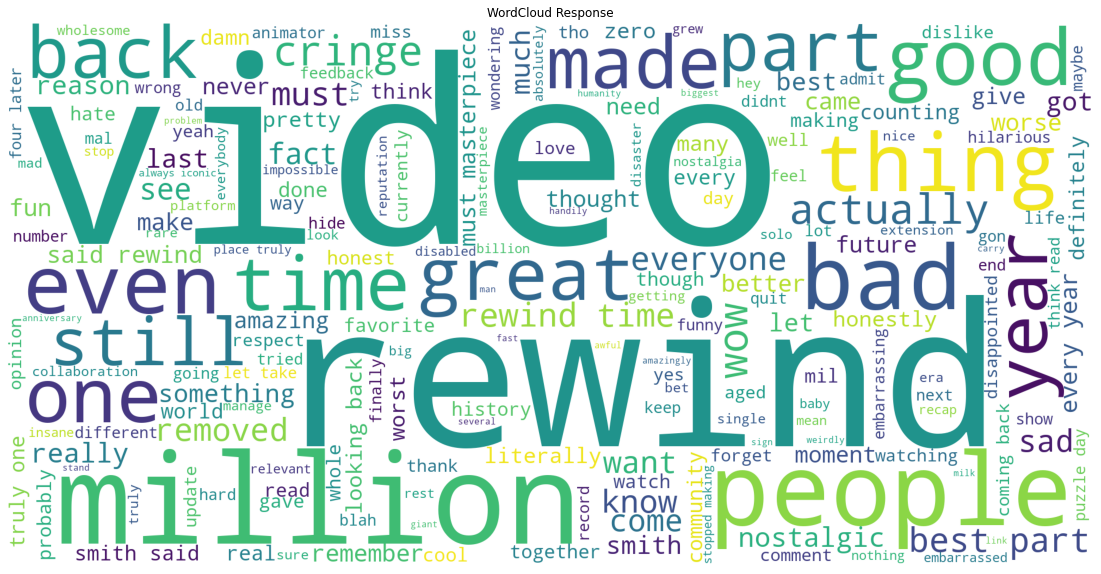

In [45]:
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(mode='RGB', background_color="white", width=2000, height=1000).generate(data)
plt.title('WordCloud Response')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Positive Response WordCloud
This word cloud represents the most positive occurring words in the overall response, with the size of each word indicating its frequency of occurrence. We can see that the words: *time*, *one*, and *even* are the 3 most common positive word without figuring out the context of the given sentence it is based on.

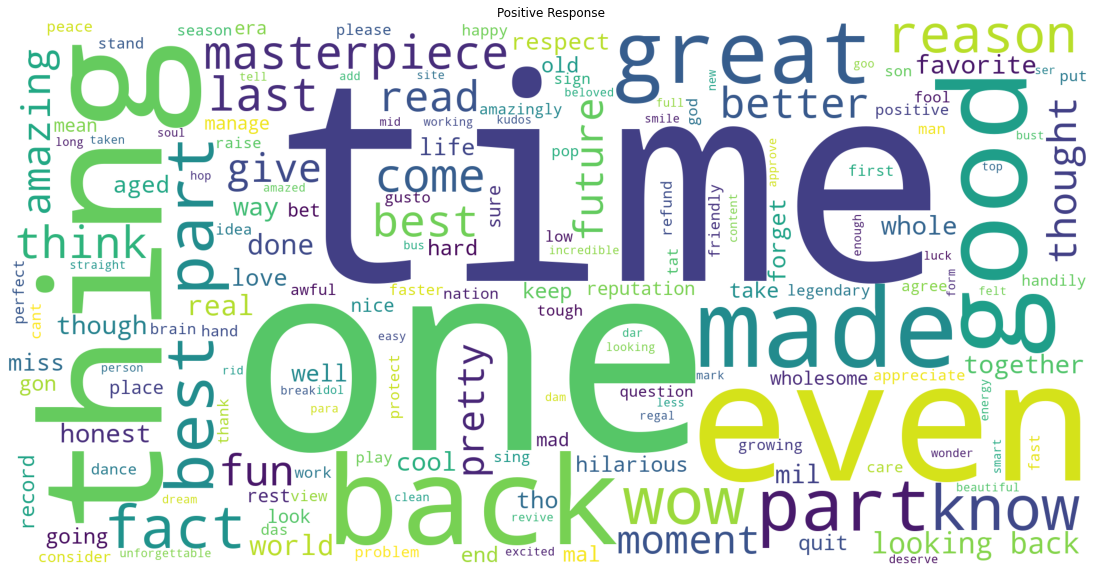

In [46]:
text = open('positiveList.txt', 'r')
data = text.read()
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(mode='RGB', background_color="white", width=2000, height=1000).generate(data)
plt.title('Positive Response')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Negative Response WordCloud
This word cloud represents the most negative occurring words in the overall response, with the size of each word indicating its frequency of occurrence. We can see that the words: *time*, *back*, and *bad* are the 3 most negative common words without figuring out the context of the given sentence it is based on.

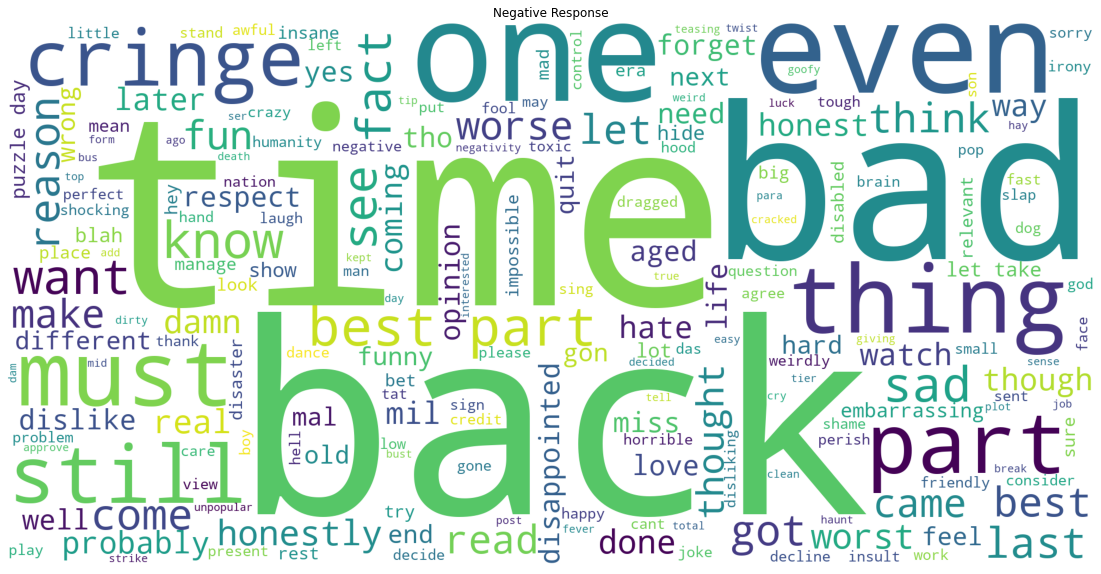

In [47]:
text = open('negativeList.txt', 'r')
data = text.read()
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(mode='RGB', background_color="white", width=2000, height=1000).generate(data)
plt.title('Negative Response')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob
import numpy as np   

In [49]:
filepath = 'rawdata.txt'
with open(filepath, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('NewSentimentList.csv', 'w')
    fa.write('Polarity,Subjectivity,Count\n')

    while line:
        data = line.strip()
        analysis = TextBlob(data)
        countList = list(analysis.sentiment)

        vs = ','.join([str(i) for i in countList])
        fa.write(vs + "," + str(cnt) + '\n')
        line = fp.readline() 
        cnt = cnt + 1

## Visualization
The results are visualized using linegraph and scatter plot to present sentiment trends and patterns. The insight the team gathered in the sample is:
- The polarity is mostly neutral despite the actual video receiving a lot of hate.
- The comments are mostly objective. As if like they are aware that the youtube video is bad overall.

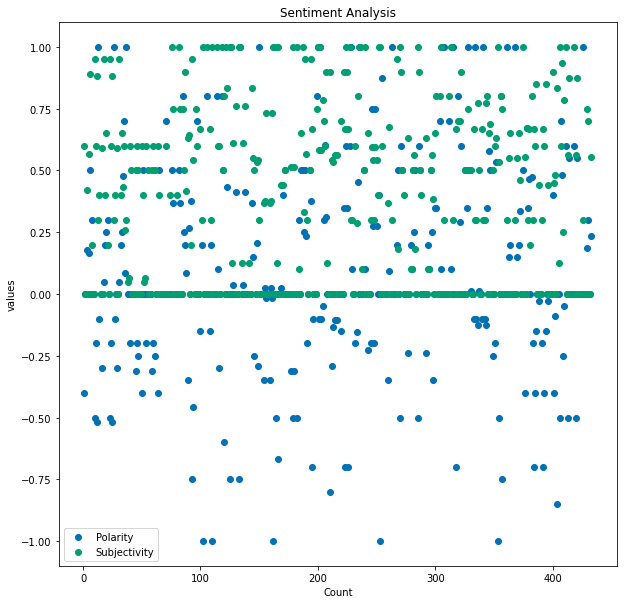

In [71]:
style.use('seaborn-colorblind')
plt.figure(figsize=(10, 10))
df = pd.read_csv('NewSentimentList.csv')
plt.scatter(data=df, x='Count', y='Polarity')
plt.scatter(data=df, x='Count', y='Subjectivity')
plt.xlabel('Count')
plt.ylabel('values')
plt.legend()
plt.title('Sentiment Analysis')
plt.show()

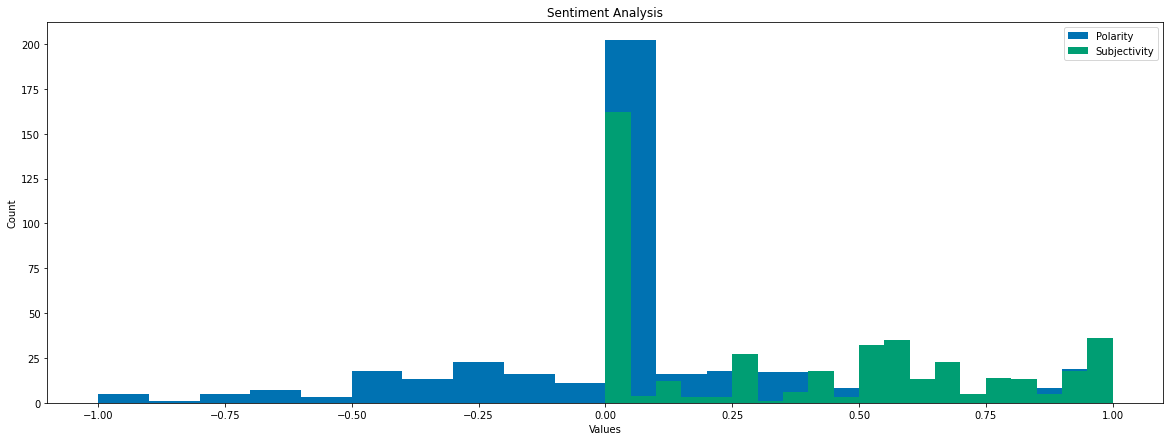

In [76]:
# create a histogram for the polarity and subjectivity
plt.figure(figsize=(20, 7))
plt.hist(df['Polarity'], bins=20, label='Polarity')
plt.hist(df['Subjectivity'], bins=20, label='Subjectivity')
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend()
plt.title('Sentiment Analysis')
plt.show()


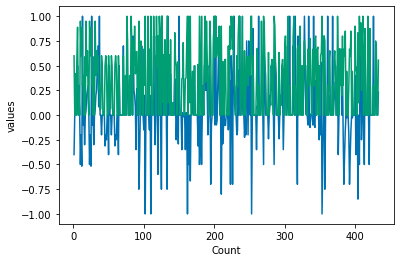

In [ ]:
x,y,z = np.loadtxt('NewSentimentList.csv', unpack=True, delimiter=',')
plt.plot(z,x)
plt.plot(z,y)
plt.xlabel('Count')
plt.ylabel('values')
plt.show()